In [7]:
import pandas as pd
from src.features.builders import *
import numpy as np
import os

## Load Collected Dataframes

In [38]:
# Load electrical dataframe
electrical_raw_df = pd.read_csv("smfdb.csv")

# Weather dataframes for 7 cities
agri_raw_df = pd.read_csv("weather_data_agri.csv")
istanbul_raw_df = pd.read_csv("weather_data_istanbul.csv")
izmir_raw_df = pd.read_csv("weather_data_izmir.csv")
konya_raw_df = pd.read_csv("weather_data_konya.csv")
ankara_raw_df = pd.read_csv("weather_data_ankara.csv")
erzurum_raw_df = pd.read_csv("weather_data_erzurum.csv")
trabzon_raw_df = pd.read_csv("weather_data_trabzon.csv")

# Building Dataset

## Merging The Datasets


#### Merge Set:
- Merge The Electric Prices Dataset With Weather Values Of 7 Cities one by one
- To use temp values to better predict the prices.
- Also we merge the city datasets one by one to not have a huge dataset with so many features
- Merge point is **'Tarih'** feature of dataset
- 26 Weather Feature + 35 EPIAŞ Features = Total of 61 Feature per city

In [39]:
merged_istanbul_df = merge_datasets(electrical_raw_df, istanbul_raw_df)
merged_istanbul_df.to_csv("merged_istanbul_df.csv")

merged_ankara_df = merge_datasets(electrical_raw_df, ankara_raw_df)
merged_ankara_df.to_csv("merged_ankara_df.csv")

merged_erzurum_df = merge_datasets(electrical_raw_df, erzurum_raw_df)
merged_erzurum_df.to_csv("merged_erzurum_df.csv")

merged_trabzon_df = merge_datasets(electrical_raw_df, trabzon_raw_df)
merged_trabzon_df.to_csv("merged_trabzon_df.csv")

merged_konya_df = merge_datasets(electrical_raw_df, konya_raw_df)
merged_konya_df.to_csv("merged_konya_df.csv")

merged_izmir_df = merge_datasets(electrical_raw_df, izmir_raw_df)
merged_izmir_df.to_csv("merged_izmir_df.csv")

merged_agri_df = merge_datasets(electrical_raw_df, agri_raw_df)
merged_agri_df.to_csv("merged_agri_df.csv")

merged_istanbul_df

,Tarih,Blokeslesmemiktari,Saatlikeslesmemiktari,Minalisfiyati,Maxalisfiyati,Minsatisfiyati,Maxsatisfiyati,Mineslesmefiyati,Maxeslesmefiyati,Talepislemhacmi,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,2019-01-01 00:00:00,44.7,331.2,5.00,101.38,60.00,100.94,60.00,100.94,1367605.72,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,69.9,527.7,5.00,100.98,93.82,296.29,93.82,100.98,1321672.20,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,98.2,196.7,41.00,81.96,40.00,81.96,41.05,81.96,1107023.11,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,101.2,414.7,1.00,45.00,4.00,45.00,4.00,45.00,635394.47,...,5.6,2019-01-01 03:00:00,2019-01-01T00:00:00,1.546301e+09,0.0,16.0,"{'description': 'Overcast clouds', 'code': 804...",50.0,7.6,4.8
4,2019-01-01 04:00:00,88.7,497.5,1.00,30.00,5.00,30.00,5.00,30.00,336212.27,...,5.6,2019-01-01 04:00:00,2019-01-01T01:00:00,1.546304e+09,0.0,16.0,"{'description': 'Overcast clouds', 'code': 804...",50.0,7.2,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40791,2023-08-27 15:00:00,2865.8,1394.6,0.01,2646.00,373.63,2781.00,373.63,1999.98,34144951.50,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40792,2023-08-27 16:00:00,2418.9,1521.7,0.00,2781.00,0.10,2781.00,444.38,2170.60,41361365.65,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40793,2023-08-27 17:00:00,2763.9,1404.2,0.00,2646.00,0.10,2781.00,376.22,2170.60,35049705.73,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40794,2023-08-27 18:00:00,2215.9,1609.4,0.00,2781.00,0.10,2781.00,574.13,2751.93,53430156.37,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# load merged dataframes from disk again
merged_istanbul_df = pd.read_csv("merged_istanbul_df.csv")
merged_ankara_df = pd.read_csv("merged_ankara_df.csv")
merged_izmir_df = pd.read_csv("merged_izmir_df.csv")
merged_konya_df = pd.read_csv("merged_konya_df.csv")
merged_trabzon_df = pd.read_csv("merged_trabzon_df.csv")
merged_erzurum_df = pd.read_csv("merged_erzurum_df.csv")
merged_agri_df = pd.read_csv("merged_agri_df.csv")

## Building Time Features

#### Extract Time features to seperated columns to better estimate the relation
- Hour
- Day
- Day of Week
- Month
- Year

**5 New Time features + 61 Existed Features = 66 Total Features**

In [41]:
merged_istanbul_df = build_time_features(merged_istanbul_df)
merged_ankara_df = build_time_features(merged_ankara_df)
merged_izmir_df = build_time_features(merged_izmir_df)
merged_trabzon_df = build_time_features(merged_trabzon_df)
merged_erzurum_df = build_time_features(merged_erzurum_df)
merged_konya_df = build_time_features(merged_konya_df)
merged_agri_df = build_time_features(merged_agri_df)

merged_istanbul_df[["Tarih", "hour", "day", "day_of_week", "month", "year", "app_temp", "Minalisfiyati", "Maxalisfiyati", "Euro", "Smf", "Ptf"]]

,Tarih,hour,day,day_of_week,month,year,app_temp,Minalisfiyati,Maxalisfiyati,Euro,Smf,Ptf
0,2019-01-01 00:00:00,0,1,1,1,2019,NaN,5.00,101.38,6.04,5.00,100.38
1,2019-01-01 01:00:00,1,1,1,1,2019,NaN,5.00,100.98,6.04,95.04,96.72
2,2019-01-01 02:00:00,2,1,1,1,2019,NaN,41.00,81.96,6.04,79.60,81.60
3,2019-01-01 03:00:00,3,1,1,1,2019,2.2,1.00,45.00,6.04,0.00,38.58
4,2019-01-01 04:00:00,4,1,1,1,2019,2.4,1.00,30.00,6.03,0.00,11.52
...,...,...,...,...,...,...,...,...,...,...,...,...
40791,2023-08-27 15:00:00,15,27,6,8,2023,NaN,0.01,2646.00,28.49,2100.00,1498.00
40792,2023-08-27 16:00:00,16,27,6,8,2023,NaN,0.00,2781.00,28.49,2017.98,1780.98
40793,2023-08-27 17:00:00,17,27,6,8,2023,NaN,0.00,2646.00,28.49,2000.00,1508.35
40794,2023-08-27 18:00:00,18,27,6,8,2023,NaN,0.00,2781.00,28.49,2299.99,2299.99


## Adding Rolling Features

#### Selected Columns For Rolling:

- **Smfdolar**: Our target in USD. Might be important for analyse price momentum
- **Talepislemhacmi**: If demand is high, prices can change accordingly. Can highlight short-term demand spikes
- **Gerceklesendogalgaz**: Key energy source that affect marginal price
- **Gerceklesenruzgar**: Wind generation can affect prices significantly.
- **wind_spd**: It is good to test how wind speed affects wind generation
- **Gerceklesengunes**: Solar energy generation can affect prices significantly.
- **solar_rad**: It is good to test how solar radiation affects solar energy generation

#### Chosen Windows:

- **24-hour window**: Capture daily cyclical patterns
- **72-hour window**: Capture multi-day trends

#### New Dataset Dimension:
- 7 feature x 2 windows x 2 different stats(mean, std) = **28 new features**
- 66 existed features + 28 new features = **94 total features**

In [42]:
dataframes = [
    merged_istanbul_df,
    merged_ankara_df,
    merged_izmir_df,
    merged_trabzon_df,
    merged_erzurum_df,
    merged_konya_df,
    merged_agri_df,
]

for i, merged_df in enumerate(dataframes):  # Use enumerate to get index
    for col in ["Smf", "Talepislemhacmi", "Gerceklesendogalgaz", "Gerceklesenruzgar", "wind_spd", "Gerceklesengunes", "solar_rad"]:
        merged_df = build_rolling_features(merged_df, col, (24, 72))
    dataframes[i] = merged_df

merged_istanbul_df = dataframes[0]
merged_ankara_df = dataframes[1]
merged_izmir_df = dataframes[2]
merged_trabzon_df = dataframes[3]
merged_erzurum_df = dataframes[4]
merged_konya_df = dataframes[5]
merged_agri_df = dataframes[6]

merged_istanbul_df

,Unnamed: 0,Tarih,Blokeslesmemiktari,Saatlikeslesmemiktari,Minalisfiyati,Maxalisfiyati,Minsatisfiyati,Maxsatisfiyati,Mineslesmefiyati,Maxeslesmefiyati,...,wind_spd_rolling_mean_72,wind_spd_rolling_std_72,Gerceklesengunes_rolling_mean_24,Gerceklesengunes_rolling_std_24,Gerceklesengunes_rolling_mean_72,Gerceklesengunes_rolling_std_72,solar_rad_rolling_mean_24,solar_rad_rolling_std_24,solar_rad_rolling_mean_72,solar_rad_rolling_std_72
0,0,2019-01-01 00:00:00,44.7,331.2,5.00,101.38,60.00,100.94,60.00,100.94,...,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01 01:00:00,69.9,527.7,5.00,100.98,93.82,296.29,93.82,100.98,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,2,2019-01-01 02:00:00,98.2,196.7,41.00,81.96,40.00,81.96,41.05,81.96,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,3,2019-01-01 03:00:00,101.2,414.7,1.00,45.00,4.00,45.00,4.00,45.00,...,4.8,NaN,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,NaN
4,4,2019-01-01 04:00:00,88.7,497.5,1.00,30.00,5.00,30.00,5.00,30.00,...,4.6,0.282843,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40791,40791,2023-08-27 15:00:00,2865.8,1394.6,0.01,2646.00,373.63,2781.00,373.63,1999.98,...,NaN,NaN,548.777500,607.366367,557.247083,612.597173,NaN,NaN,NaN,NaN
40792,40792,2023-08-27 16:00:00,2418.9,1521.7,0.00,2781.00,0.10,2781.00,444.38,2170.60,...,NaN,NaN,545.611667,603.979917,557.053472,612.411283,NaN,NaN,NaN,NaN
40793,40793,2023-08-27 17:00:00,2763.9,1404.2,0.00,2646.00,0.10,2781.00,376.22,2170.60,...,NaN,NaN,542.070000,602.198060,557.316944,612.509635,NaN,NaN,NaN,NaN
40794,40794,2023-08-27 18:00:00,2215.9,1609.4,0.00,2781.00,0.10,2781.00,574.13,2751.93,...,NaN,NaN,540.444167,603.087972,556.961389,612.708989,NaN,NaN,NaN,NaN



## Building Lag Features

#### Selected Features:

- **Smf**:Main Variable that helps capture the direct auto-correlation of the price itself
- **Talepislemhacmi**: Total demand to test how the demand from previous hours affects the price
- **Gerceklesendogalgaz**: Generated natural gas to test how the gas generation from previous hours affects the price
- **Gerceklesenruzgar**: Generated wind energy to test how the wind energy from previous hours affects the price
- **Gerceklesengunes**: Generated solar energy to test how the solar energy from previous hours affects the price


#### Lag Amount:

- **1 Hour lag**: Values from previous hour
- **24 Hour lag**: Values from previous day


#### New Dataset Dimension:
- 5 features x 2 lag feature = **10 new features**
- 94 existing feature + 10 new features = **104 Dataset Dimension**

In [43]:
selected_cols = ['Smf', 'Talepislemhacmi', 'Gerceklesendogalgaz', 'Gerceklesenruzgar', 'Gerceklesengunes']

for i, merged_df in enumerate(dataframes):
    merged_df = build_lag_features_multi(merged_df, selected_cols, (1, 24))
    dataframes[i] = merged_df

merged_istanbul_df = dataframes[0]
merged_ankara_df = dataframes[1]
merged_izmir_df = dataframes[2]
merged_trabzon_df = dataframes[3]
merged_erzurum_df = dataframes[4]
merged_konya_df = dataframes[5]
merged_agri_df = dataframes[6]

merged_istanbul_df

,Unnamed: 0,Tarih,Blokeslesmemiktari,Saatlikeslesmemiktari,Minalisfiyati,Maxalisfiyati,Minsatisfiyati,Maxsatisfiyati,Mineslesmefiyati,Maxeslesmefiyati,...,Smf_lag_1,Smf_lag_24,Talepislemhacmi_lag_1,Talepislemhacmi_lag_24,Gerceklesendogalgaz_lag_1,Gerceklesendogalgaz_lag_24,Gerceklesenruzgar_lag_1,Gerceklesenruzgar_lag_24,Gerceklesengunes_lag_1,Gerceklesengunes_lag_24
0,24,2019-01-02 00:00:00,100.9,164.3,80.00,114.00,100.00,140.0,100.00,114.00,...,122.00,5.00,1550228.84,1367605.72,5769.64,4792.98,3048.11,2936.84,0.00,0.0
1,25,2019-01-02 01:00:00,99.3,240.3,0.00,90.00,80.00,300.0,82.00,90.00,...,103.01,95.04,1592752.18,1321672.20,5549.90,4563.49,2982.92,3059.46,0.02,0.0
2,26,2019-01-02 02:00:00,109.2,176.4,3.00,85.00,75.00,300.0,78.01,85.00,...,38.25,79.60,1390160.62,1107023.11,6127.39,4288.07,2845.83,3256.68,0.00,0.0
3,27,2019-01-02 03:00:00,77.0,151.1,1.00,50.00,30.00,300.0,31.10,50.00,...,0.00,0.00,1290181.82,635394.47,6267.88,4157.03,2584.68,3474.83,0.00,0.0
4,28,2019-01-02 04:00:00,51.9,182.3,1.00,41.00,28.00,300.0,28.00,41.00,...,0.00,0.00,849871.27,336212.27,6326.78,4163.74,2463.38,3594.82,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35206,36430,2023-02-26 22:00:00,995.3,1141.1,1.10,1110.00,100.00,3760.0,100.00,1110.00,...,2950.00,2689.99,44219902.09,49526724.28,1883.84,5364.58,9102.37,7713.60,0.00,0.0
35207,36431,2023-02-26 23:00:00,1038.7,1587.3,0.00,966.66,55.00,3760.0,55.00,966.66,...,1250.00,2249.90,17163381.07,38351944.64,1841.59,3719.59,9078.98,7655.97,0.00,0.0
35208,36432,2023-02-27 00:00:00,873.6,412.8,0.01,1122.60,108.99,3760.0,108.99,1099.93,...,549.99,2317.00,9355531.01,37147536.38,1881.34,2721.29,9018.24,7807.71,0.00,0.0
35209,36433,2023-02-27 01:00:00,873.2,793.6,0.00,3760.00,108.99,3760.0,108.99,1099.93,...,139.90,1700.00,17232355.08,23685993.35,1969.16,2434.29,9130.92,7978.02,0.00,0.0


In [44]:
merged_istanbul_df.to_csv("merged_istanbul_df.csv")
merged_ankara_df.to_csv("merged_ankara_df.csv")
merged_erzurum_df.to_csv("merged_erzurum_df.csv")
merged_trabzon_df.to_csv("merged_trabzon_df.csv")
merged_konya_df.to_csv("merged_konya_df.csv")
merged_izmir_df.to_csv("merged_izmir_df.csv")
merged_agri_df.to_csv("merged_agri_df.csv")

In [45]:
# load merged dataframes from disk again
merged_istanbul_df = pd.read_csv("merged_istanbul_df.csv")
merged_ankara_df = pd.read_csv("merged_ankara_df.csv")
merged_izmir_df = pd.read_csv("merged_izmir_df.csv")
merged_konya_df = pd.read_csv("merged_konya_df.csv")
merged_trabzon_df = pd.read_csv("merged_trabzon_df.csv")
merged_erzurum_df = pd.read_csv("merged_erzurum_df.csv")
merged_agri_df = pd.read_csv("merged_agri_df.csv")

# Select The Features

## Explore Data

### Explore Data Statistically

In [46]:
merged_istanbul_df[
    ["Smfdolar",
    "Talepislemhacmi",
    "Gerceklesengunes",
    "Gerceklesenruzgar",
    "temp",
     ]].describe()

,Smfdolar,Talepislemhacmi,Gerceklesengunes,Gerceklesenruzgar,temp
count,35211.000000,3.521100e+04,35211.000000,35211.000000,35211.000000
mean,75.570920,2.046473e+07,144.189164,3211.522194,15.561560
std,59.738052,2.554787e+07,272.360308,1918.157508,7.529261
min,0.000000,0.000000e+00,-1.700000,1.140000,-5.000000
25%,40.530000,5.419955e+06,0.000000,1617.755000,9.400000
50%,52.810000,7.603190e+06,4.840000,2935.690000,15.200000
75%,94.640000,2.544678e+07,132.365000,4530.450000,22.300000
max,272.420000,1.201589e+08,1631.620000,13581.390000,35.500000


In [48]:
merged_ankara_df.describe()

C:\Users\emirs\Documents\Projects\python\learning-from-data-kilowizards\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\emirs\Documents\Projects\python\learning-from-data-kilowizards\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0.1,Unnamed: 0,Blokeslesmemiktari,Saatlikeslesmemiktari,Minalisfiyati,Maxalisfiyati,Minsatisfiyati,Maxsatisfiyati,Mineslesmefiyati,Maxeslesmefiyati,...,Smf_lag_1,Smf_lag_24,Talepislemhacmi_lag_1,Talepislemhacmi_lag_24,Gerceklesendogalgaz_lag_1,Gerceklesendogalgaz_lag_24,Gerceklesenruzgar_lag_1,Gerceklesenruzgar_lag_24,Gerceklesengunes_lag_1,Gerceklesengunes_lag_24
count,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,...,35211.000000,35211.000000,3.521100e+04,3.521100e+04,35211.000000,35211.00000,35211.000000,35211.000000,35211.000000,35211.000000
mean,17605.000000,18229.340803,493.237255,765.921831,164.880548,1133.640665,450.914473,1417.785822,478.875942,1116.570869,...,976.997916,975.754921,2.046320e+07,2.043998e+07,8640.942768,8642.41026,3211.353401,3201.710891,144.189172,144.077380
std,10164.684501,10517.982794,342.419057,615.417428,261.657461,1343.366661,597.985393,1533.938982,614.829824,1324.850193,...,1227.040863,1226.038321,2.554805e+07,2.552589e+07,4108.169836,4103.70069,1917.977047,1909.928252,272.360304,271.975292
min,0.000000,24.000000,0.000000,0.000000,0.000000,2.790000,0.000000,13.990000,0.000000,2.790000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,12.850000,12.85000,1.140000,1.140000,-1.700000,-1.700000
25%,8802.500000,9126.500000,245.900000,333.200000,1.000000,320.430000,107.000000,387.000000,150.000000,319.000000,...,273.000000,273.705000,5.419323e+06,5.417766e+06,5458.420000,5453.54000,1617.560000,1608.730000,0.000000,0.000000
50%,17605.000000,18229.000000,405.300000,593.600000,73.060000,370.000000,266.950000,479.990000,280.000000,360.740000,...,347.830000,348.000000,7.602802e+06,7.607136e+06,8756.330000,8767.72000,2935.690000,2937.930000,4.840000,4.830000
75%,26407.500000,27331.500000,673.900000,1016.900000,217.060000,1442.120000,465.000000,2000.000000,512.905000,1412.130000,...,1217.000000,1217.000000,2.544297e+07,2.535612e+07,11531.085000,11538.73500,4530.450000,4511.590000,132.365000,132.290000
max,35210.000000,36434.000000,16801.600000,6180.400000,2668.490000,9999.990000,4372.120000,4944.000000,4700.000000,4944.000000,...,4800.000000,4800.000000,1.201589e+08,1.201589e+08,19453.650000,19453.65000,13581.390000,13581.390000,1631.620000,1631.620000


In [9]:
important_features = [
    "Smfdolar",
    "Talepislemhacmi",
    "Gerceklesendogalgaz",
    "Gerceklesenruzgar",
    "wind_spd",
]

# Basic info
print(merged_istanbul_df.info())

# Describe only selected columns
merged_istanbul_df[important_features].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35211 entries, 0 to 35210
Columns: 106 entries, Unnamed: 0 to Gerceklesengunes_lag_24
dtypes: datetime64[ns](1), float64(91), int32(5), int64(4), object(5)
memory usage: 27.8+ MB
None


,Smfdolar,Talepislemhacmi,Gerceklesendogalgaz,Gerceklesenruzgar,wind_spd
count,35211.000000,3.521100e+04,35211.000000,35211.000000,35211.000000
mean,75.570920,2.046473e+07,8641.333217,3211.522194,3.727437
std,59.738052,2.554787e+07,4108.054643,1918.157508,2.581625
min,0.000000,0.000000e+00,12.850000,1.140000,0.000000
25%,40.530000,5.419955e+06,5460.920000,1617.755000,1.500000
50%,52.810000,7.603190e+06,8756.330000,2935.690000,3.110000
75%,94.640000,2.544678e+07,11531.295000,4530.450000,5.515000
max,272.420000,1.201589e+08,19453.650000,13581.390000,19.000000


In [30]:
target_col = 'Gerceklesenruzgar'  # or 'Smfdolar', 'Ptf', etc.

# Ensure numeric-only for correlation
numeric_cols = merged_istanbul_df.select_dtypes(include=[np.number]).columns
df_num = merged_istanbul_df[numeric_cols].dropna(subset=[target_col])

corr_with_target = df_num.corr()[target_col].sort_values(key=abs, ascending=False)
print("Correlation with target:", target_col)
print(corr_with_target.head(30))  # top 20 absolute correlations


Correlation with target: Gerceklesenruzgar
Gerceklesenruzgar                     1.000000
Gerceklesenruzgar_lag_1               0.993894
Gerceklesenruzgar_rolling_mean_24     0.855575
Gerceklesenruzgar_rolling_mean_72     0.616542
Gerceklesenruzgar_lag_24              0.587285
wind_gust_spd                         0.559985
wind_spd_rolling_mean_24              0.484903
wind_spd                              0.478500
Blokeslesmemiktari                    0.407952
wind_spd_rolling_mean_72              0.356365
wind_spd_rolling_std_24               0.340436
Gerceklesenruzgar_rolling_std_72      0.309014
year                                  0.304858
Gerceklesenbiyokutle                  0.303926
Unnamed: 0                            0.300417
ts                                    0.300417
Smf_rolling_std_24                    0.299018
wind_spd_rolling_std_72               0.288943
Euro                                  0.287270
Dolar                                 0.277457
Gerceklesengunes_

In [31]:
target_col = 'Gerceklesengunes'

# Ensure numeric-only for correlation
numeric_cols = merged_istanbul_df.select_dtypes(include=[np.number]).columns
df_num = merged_istanbul_df[numeric_cols].dropna(subset=[target_col])

corr_with_target = df_num.corr()[target_col].sort_values(key=abs, ascending=False)
print("Correlation with target:", target_col)
print(corr_with_target.head(30))  # top 20 absolute correlations


Correlation with target: Gerceklesengunes
Gerceklesengunes                    1.000000
Gerceklesengunes_lag_24             0.964602
Gerceklesengunes_lag_1              0.949084
dhi                                 0.601825
dni                                 0.595808
ghi                                 0.591763
elev_angle                          0.555881
solar_rad                           0.554043
uv                                  0.519246
Gerceklesengunes_rolling_mean_24    0.507880
Gerceklesengunes_rolling_std_24     0.502067
Gerceklesengunes_rolling_mean_72    0.501985
Gerceklesengunes_rolling_std_72     0.493709
Arzislemhacmi                       0.431896
Talepislemhacmi_lag_24              0.429545
Talepislemhacmi                     0.423618
Gerceklesenbiyokutle                0.420994
ts                                  0.413610
Unnamed: 0                          0.413610
Dolar                               0.406181
year                                0.405052
Euro         

### Correlation With Target

- Select only numeric columns from the dataset
- Drop rows that are missing the target value (`Smf`)
- Compute the correlation of every numeric feature with `Smf`
- Sort these correlations by absolute value and print the top 20
- Identify which features are most correlated with `Smf`, revealing potential key drivers of the price

Note: Skip All the values like **'Smfdolar'** for better correlation analysis

In [20]:
import numpy as np

target_col = 'Smf'  # or 'Smfdolar', 'Ptf', etc.

# Ensure numeric-only for correlation
numeric_cols = merged_istanbul_df.select_dtypes(include=[np.number]).columns
df_num = merged_istanbul_df[numeric_cols].dropna(subset=[target_col])

corr_with_target = df_num.corr()[target_col].sort_values(key=abs, ascending=False)
print("Correlation with target:", target_col)
print(corr_with_target.head(30))  # top 20 absolute correlations


Correlation with target: Smf
Smf                                1.000000
Smfeuro                            0.985418
Smfdolar                           0.981301
Ptf                                0.976633
Smf_lag_1                          0.971135
Maxeslesmefiyati                   0.965960
Ptfeuro                            0.962220
Maxalisfiyati                      0.961003
Arzislemhacmi                      0.960944
Talepislemhacmi                    0.960489
Ptfdolar                           0.958420
Smf_rolling_mean_24                0.943927
Talepislemhacmi_lag_1              0.941212
Smf_rolling_mean_72                0.932253
Talepislemhacmi_rolling_mean_24    0.930737
Talepislemhacmi_rolling_mean_72    0.924453
Smf_lag_24                         0.921988
Maxsatisfiyati                     0.912311
Talepislemhacmi_lag_24             0.911501
Dolar                              0.884211
Talepislemhacmi_rolling_std_72     0.876000
Talepislemhacmi_rolling_std_24     0.864689
Eur

In [21]:
corr_with_target.drop(
    [target_col, "Smfeuro", "Smfdolar", "Smf_lag_1", "Ptfeuro", "Ptfdolar", "Smf_rolling_mean_24", "Smf_rolling_mean_72", "Smf_lag_24", "Smf_rolling_std_72", "Unnamed: 0"],
    inplace=True)
print(corr_with_target.head(20))

Ptf                                0.976633
Maxeslesmefiyati                   0.965960
Maxalisfiyati                      0.961003
Arzislemhacmi                      0.960944
Talepislemhacmi                    0.960489
Talepislemhacmi_lag_1              0.941212
Talepislemhacmi_rolling_mean_24    0.930737
Talepislemhacmi_rolling_mean_72    0.924453
Maxsatisfiyati                     0.912311
Talepislemhacmi_lag_24             0.911501
Dolar                              0.884211
Talepislemhacmi_rolling_std_72     0.876000
Talepislemhacmi_rolling_std_24     0.864689
Euro                               0.855915
Mineslesmefiyati                   0.790275
Minsatisfiyati                     0.768738
ts                                 0.748494
Gerceklesengunes_rolling_std_72    0.745073
Smf_rolling_std_24                 0.738289
Gerceklesengunes_rolling_std_24    0.729652
Name: Smf, dtype: float64


## Visualization

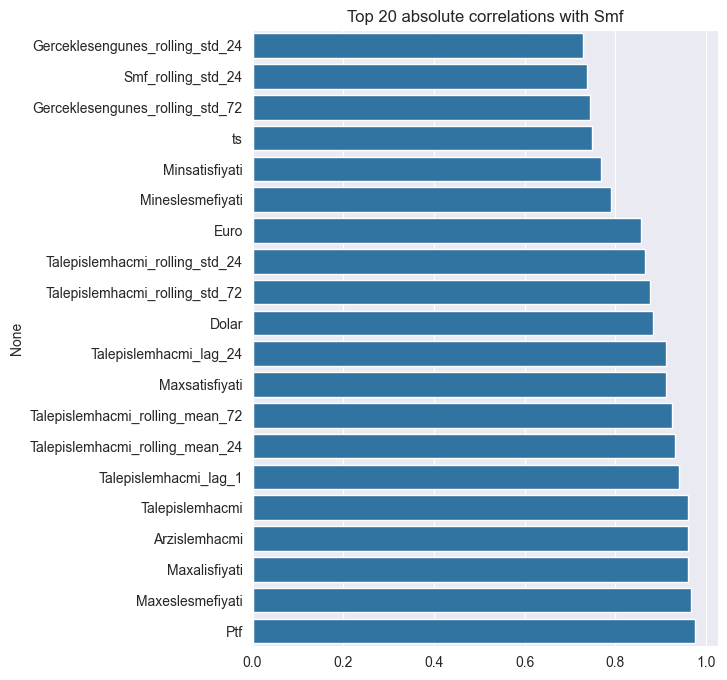

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20
top_corr = corr_with_target.head(top_n).iloc[::-1]  # reverse so highest is at bottom

plt.figure(figsize=(6,8))
sns.barplot(x=top_corr.values, y=top_corr.index, orient='h')
plt.title(f"Top {top_n} absolute correlations with {target_col}")
plt.show()


### Correlation Results
- **Price Columns Are Strongly Inter-Connected**
  - `Smf` and `Ptf` show near-perfect correlation with each other and with features like `Maxeslesmefiyati` and `Maxalisfiyati`, indicating these price-related columns move closely together.

- **Demand & Supply Matter**
  - Both `Talepislemhacmi` (demand volume) and `Arzislemhacmi` (supply volume) exhibit high correlation with price features, highlighting the influence of market demand/supply on final prices.

- **Lags & Rolling Means**
  - Lagged (e.g. `Talepislemhacmi_lag_1`) and rolling mean (e.g. `Talepislemhacmi_rolling_mean_24`) features also strongly correlate with the original columns, reflecting the continuity and time-dependent structure of the data.

- **Exchange Rates**
  - `Dolar` and `Euro` have moderately high correlation with price columns, suggesting currency fluctuations still influence energy prices but to a lesser extent than direct demand/supply variables.

- **High Multicollinearity**
  - Many features in this top set share high inter-correlation, so care should be taken in modeling to manage redundancy and prevent overfitting.


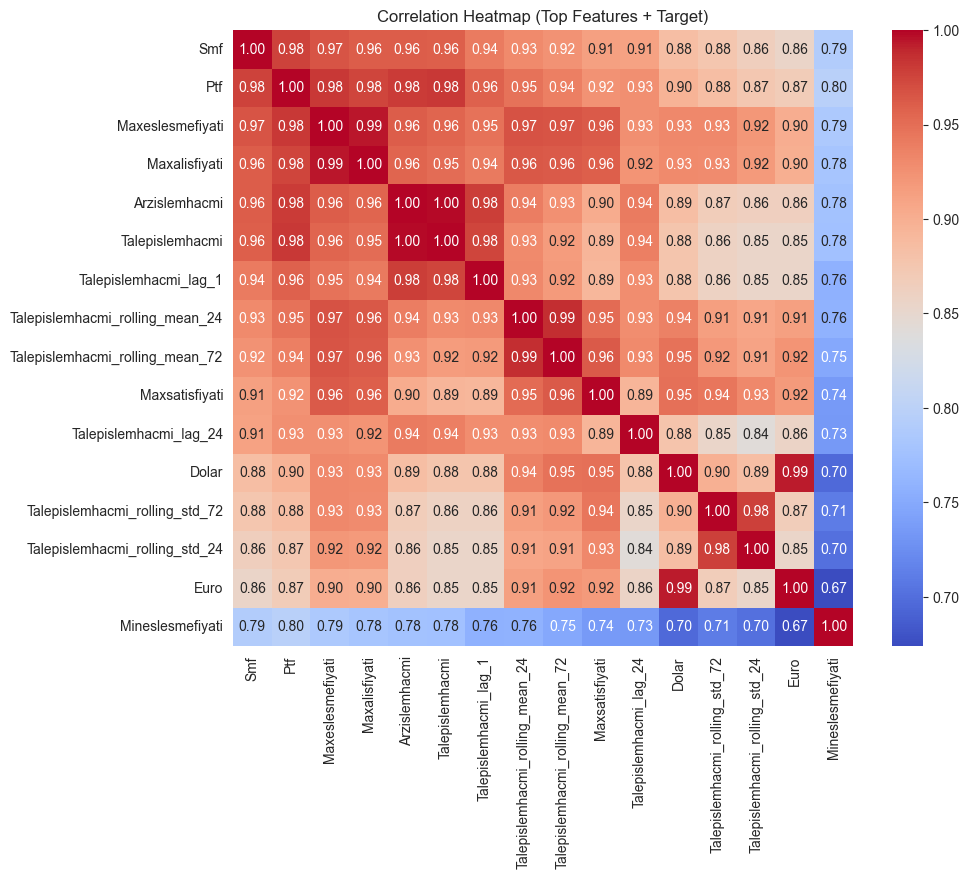

In [25]:
top_features = corr_with_target.index[:15].tolist()  # top 15
subset_cols = [target_col] + [col for col in top_features if col != target_col]

plt.figure(figsize=(10,8))
corr_mat = df_num[subset_cols].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Top Features + Target)")
plt.show()


### Multi-Collinearity
- **Prices Correlate Strongly**
  - The plots show that `Smf` and `Ptf` share a near-linear relationship, reinforcing how closely these two prices track each other.

- **Maxeslesmefiyati Ties to Price**
  - `Maxeslesmefiyati` similarly aligns with both `Smf` and `Ptf`, indicating all three price-related measures move in tandem.

- **High Concentration at Lower Values**
  - The KDE curves along the diagonal suggest these variables are **heavily skewed**, with many observations concentrated at lower price levels but some outliers at higher values.

- **Demand Lag Impacts Price**
  - `Talepislemhacmi_lag_1` (demand volume from the previous hour) appears positively associated with current `Smf` and `Ptf`, although on a different numeric scale.

- **Overall Positive Trends**
  - Across the scatter plots, we see an upward slope for each pairwise comparison, underscoring that increases in demand or one price metric often accompany increases in the others.


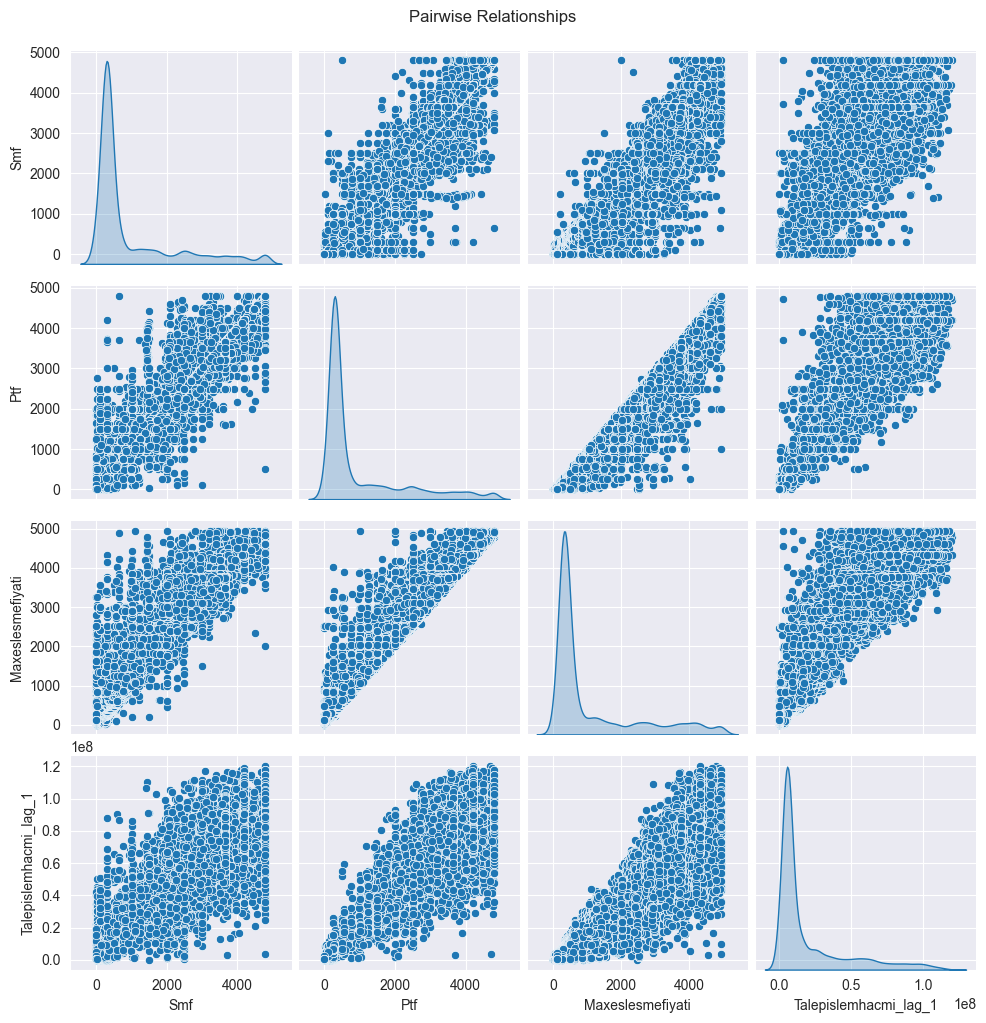

In [26]:
import seaborn as sns

sample_features = [target_col, 'Ptf', 'Maxeslesmefiyati', 'Talepislemhacmi_lag_1']
sns.pairplot(df_num[sample_features].dropna(), diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


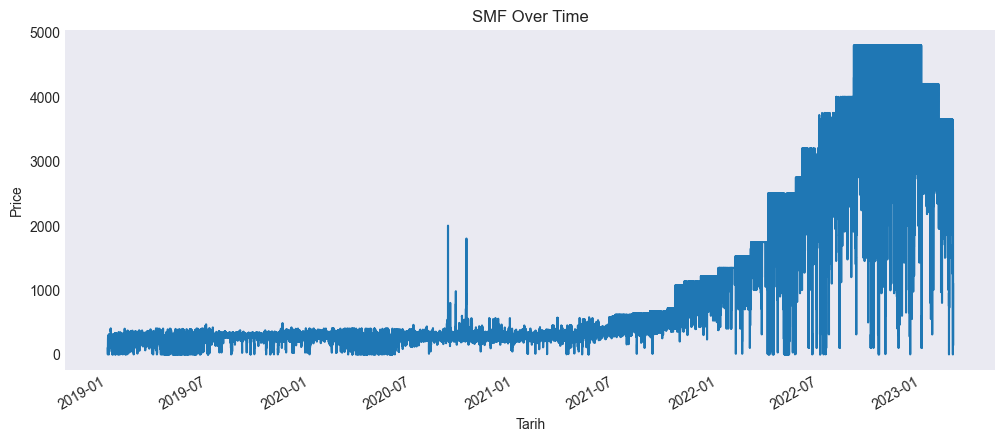

In [15]:
plt.figure(figsize=(12,5))
merged_istanbul_df.set_index('Tarih')['Smf'].plot()
plt.title("SMF Over Time")
plt.ylabel("Price")
plt.show()


SMF Prices are increasing over time(Especially after Pandemic)

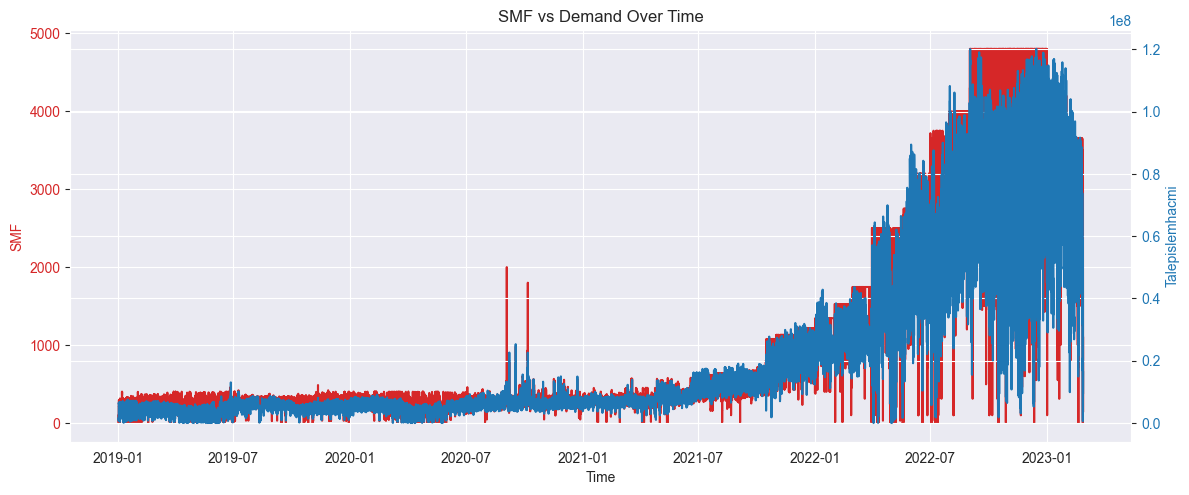

In [27]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.set_xlabel("Time")
ax1.set_ylabel("SMF", color="tab:red")
ax1.plot(merged_istanbul_df['Tarih'], merged_istanbul_df['Smf'], color="tab:red", label="SMF")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # second y-axis
ax2.set_ylabel("Talepislemhacmi", color="tab:blue")
ax2.plot(merged_istanbul_df['Tarih'], merged_istanbul_df['Talepislemhacmi'], color="tab:blue", label="Demand")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title("SMF vs Demand Over Time")
plt.show()


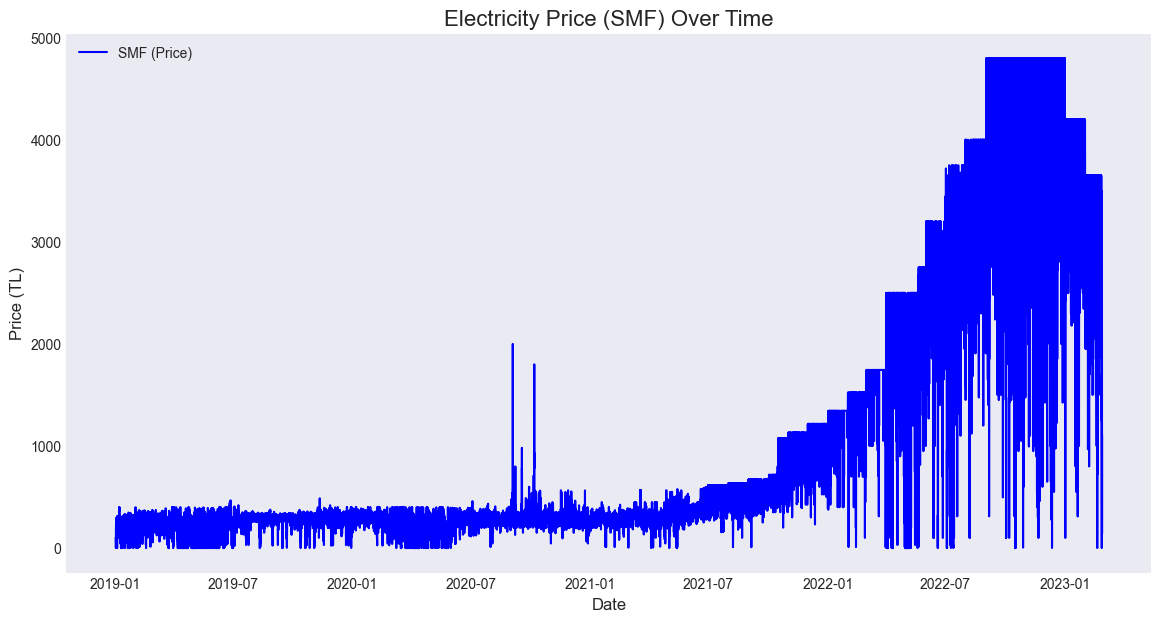

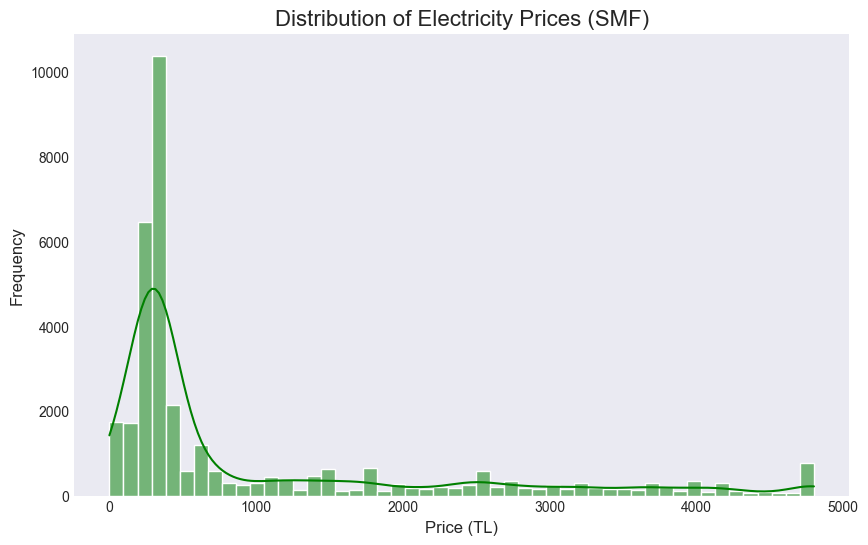

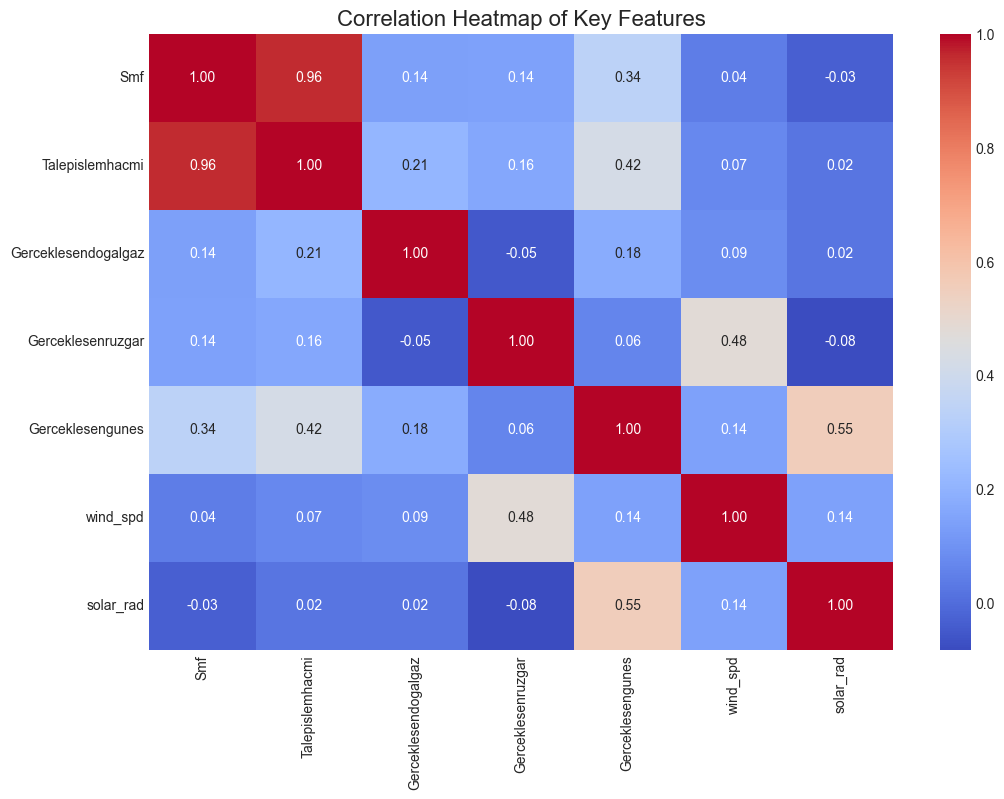

C:\Users\emirs\AppData\Local\Temp\ipykernel_23996\1552553276.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_istanbul_df, x="month", y="Smf", palette="Set3")


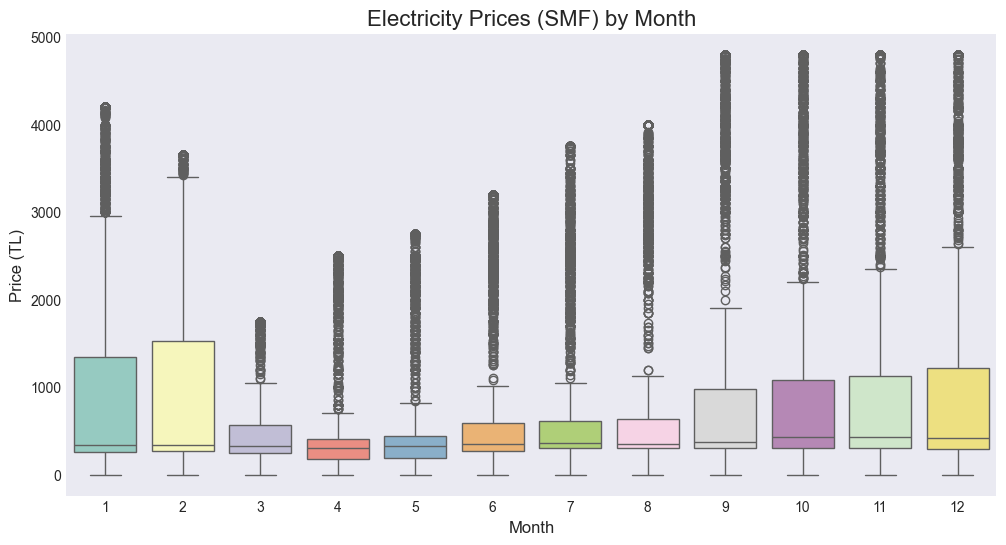

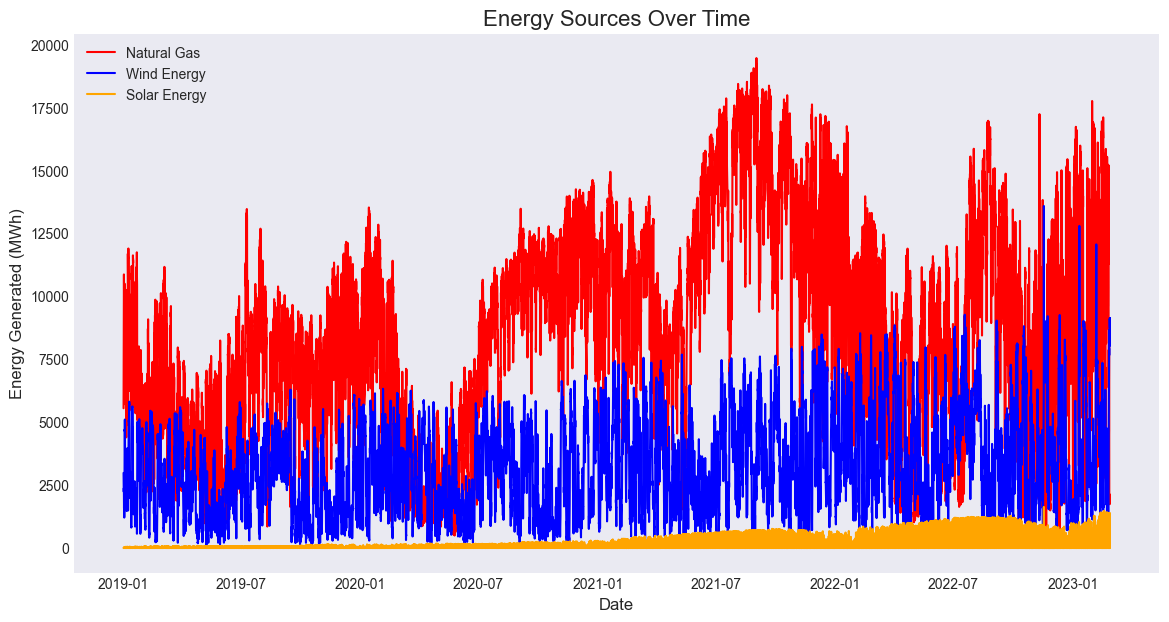

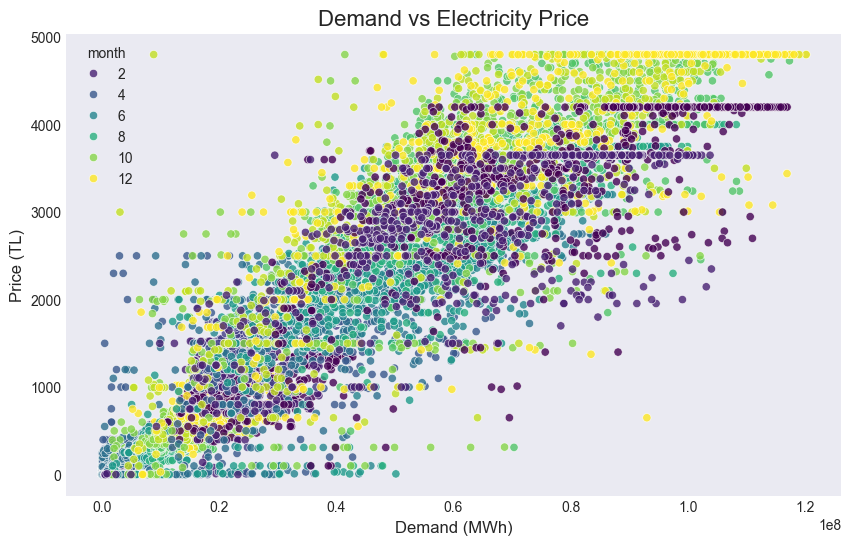

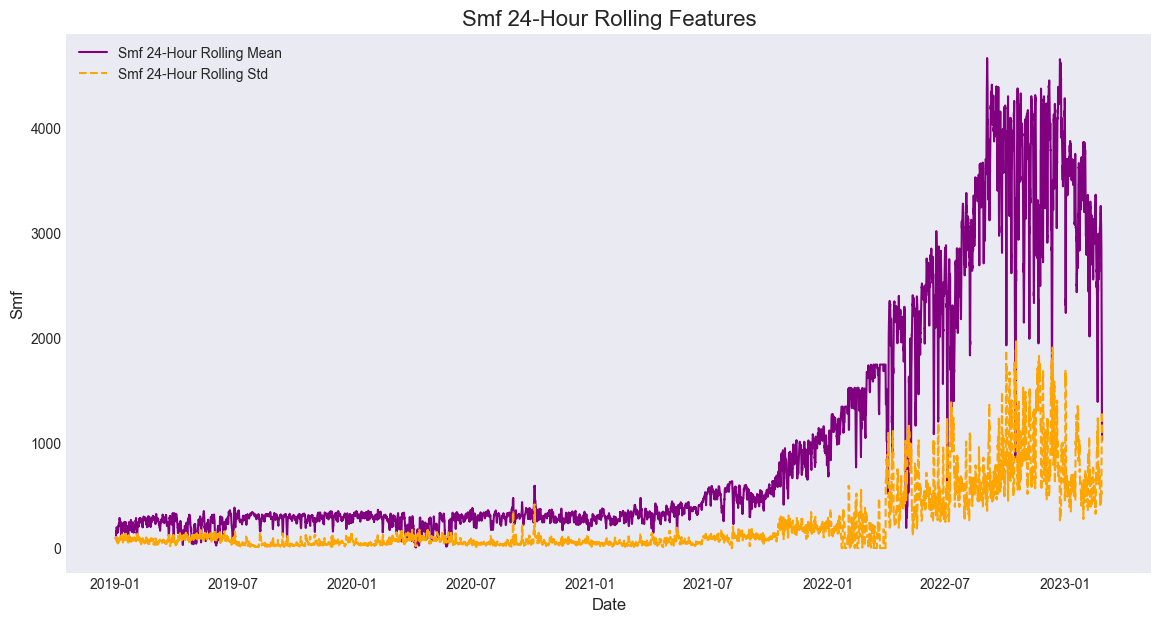

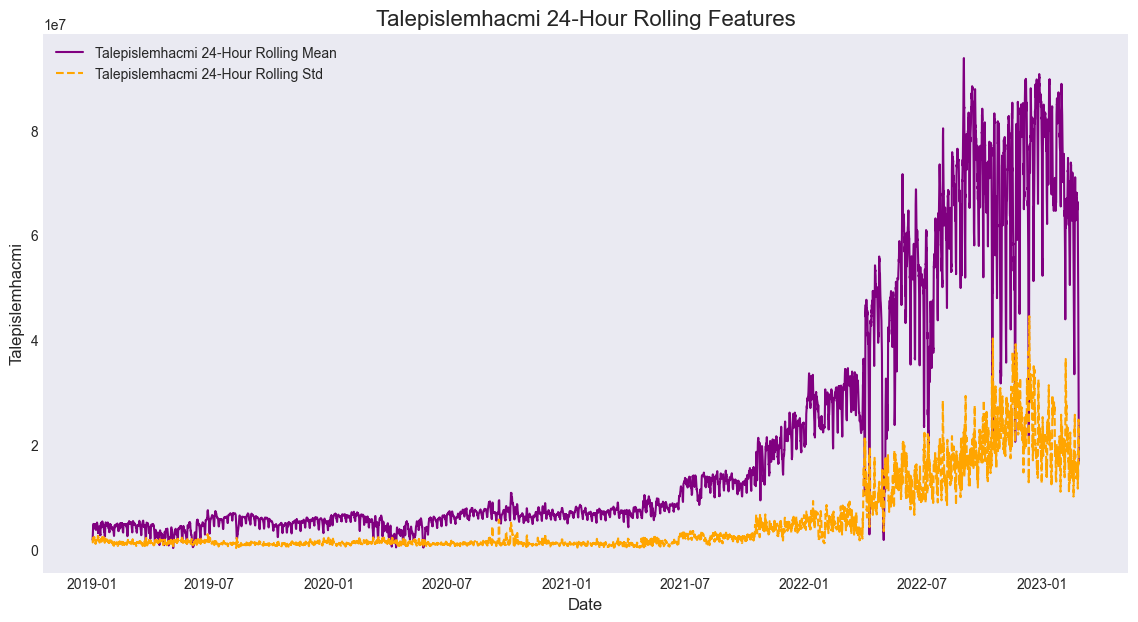

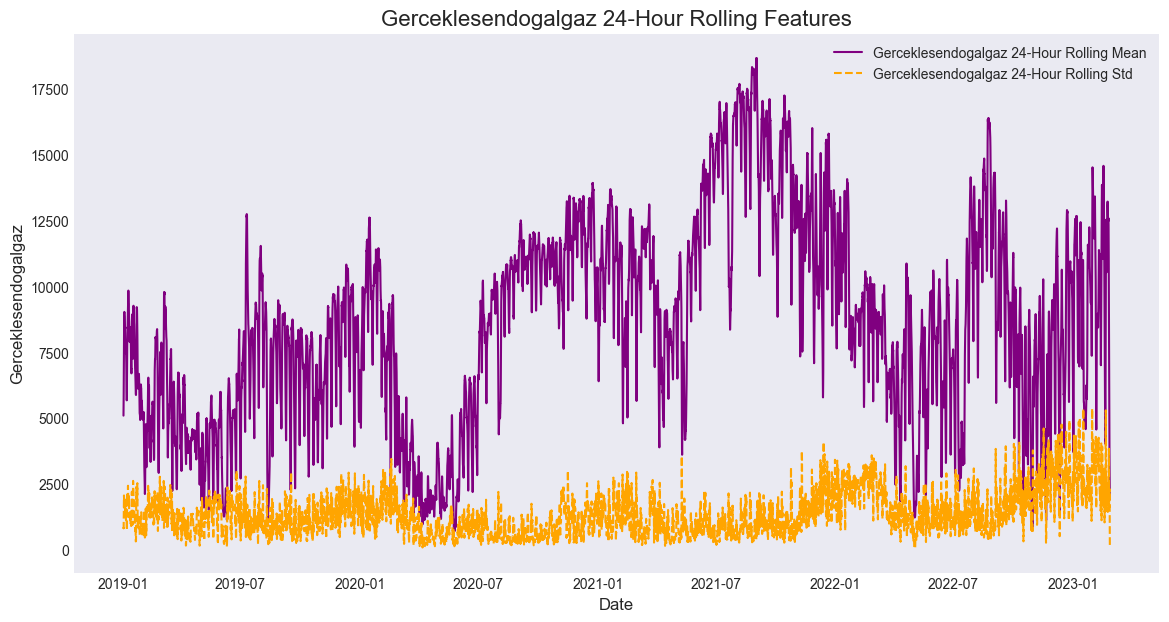

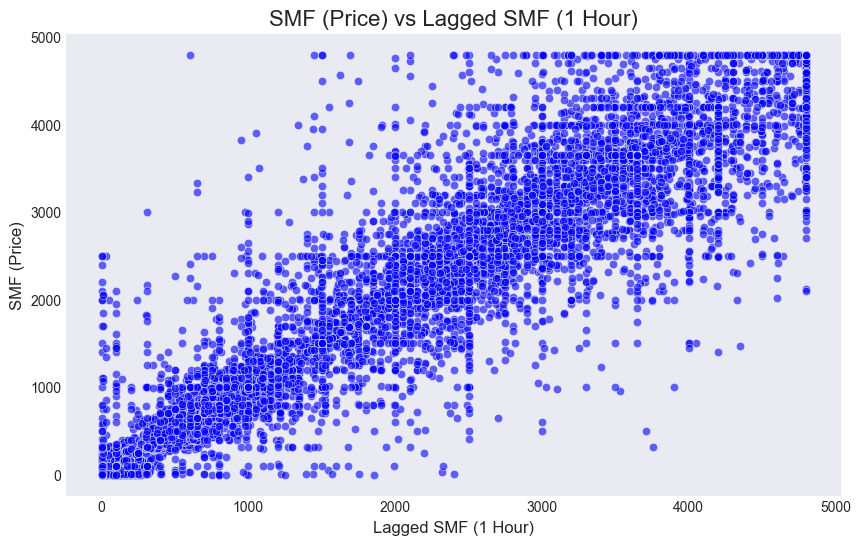

In [28]:
# --- Visualization Section ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
plt.style.use("seaborn-v0_8-dark")

# Select key columns for visualization
columns_to_visualize = [
    "Tarih",  # Date for time series plots
    "Smf",  # Electricity prices
    "Talepislemhacmi",  # Total demand
    "Gerceklesendogalgaz",  # Generated natural gas
    "Gerceklesenruzgar",  # Generated wind energy
    "Gerceklesengunes",  # Generated solar energy
    "wind_spd",  # Wind speed
    "solar_rad",  # Solar radiation
]

# --- 1. Line Plot of Target Variable (SMF) Over Time ---
plt.figure(figsize=(14, 7))
plt.plot(merged_istanbul_df["Tarih"], merged_istanbul_df["Smf"], label="SMF (Price)", color="blue")
plt.title("Electricity Price (SMF) Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (TL)", fontsize=12)
plt.legend()
plt.show()

# --- 2. Distribution of SMF ---
plt.figure(figsize=(10, 6))
sns.histplot(merged_istanbul_df["Smf"], bins=50, kde=True, color="green")
plt.title("Distribution of Electricity Prices (SMF)", fontsize=16)
plt.xlabel("Price (TL)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# --- 3. Heatmap of Correlations ---
correlation_matrix = merged_istanbul_df[columns_to_visualize[1:]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Key Features", fontsize=16)
plt.show()

# --- 4. Boxplot of SMF by Month ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_istanbul_df, x="month", y="Smf", palette="Set3")
plt.title("Electricity Prices (SMF) by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Price (TL)", fontsize=12)
plt.show()

# --- 5. Time Series Plot for Energy Sources ---
plt.figure(figsize=(14, 7))
plt.plot(
    merged_istanbul_df["Tarih"],
    merged_istanbul_df["Gerceklesendogalgaz"],
    label="Natural Gas", color="red"
)
plt.plot(
    merged_istanbul_df["Tarih"],
    merged_istanbul_df["Gerceklesenruzgar"],
    label="Wind Energy", color="blue"
)
plt.plot(
    merged_istanbul_df["Tarih"],
    merged_istanbul_df["Gerceklesengunes"],
    label="Solar Energy", color="orange"
)
plt.title("Energy Sources Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Energy Generated (MWh)", fontsize=12)
plt.legend()
plt.show()

# --- 6. Relationship Between Demand and Price ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_istanbul_df, x="Talepislemhacmi", y="Smf", hue="month", palette="viridis", alpha=0.8)
plt.title("Demand vs Electricity Price", fontsize=16)
plt.xlabel("Demand (MWh)", fontsize=12)
plt.ylabel("Price (TL)", fontsize=12)
plt.show()

# --- 7. Rolling Features Visualization ---
rolling_cols = [
    "Smf",
    "Talepislemhacmi",
    "Gerceklesendogalgaz"
]
for col in rolling_cols:
    plt.figure(figsize=(14, 7))
    plt.plot(merged_istanbul_df["Tarih"], merged_istanbul_df[f"{col}_rolling_mean_24"], label=f"{col} 24-Hour Rolling Mean", color="purple")
    plt.plot(merged_istanbul_df["Tarih"], merged_istanbul_df[f"{col}_rolling_std_24"], label=f"{col} 24-Hour Rolling Std", linestyle="--", color="orange")
    plt.title(f"{col} 24-Hour Rolling Features", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"{col}", fontsize=12)
    plt.legend()
    plt.show()

# --- 8. Lag Features for Price (SMF) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_istanbul_df, x="Smf_lag_1", y="Smf", alpha=0.6, color="blue")
plt.title("SMF (Price) vs Lagged SMF (1 Hour)", fontsize=16)
plt.xlabel("Lagged SMF (1 Hour)", fontsize=12)
plt.ylabel("SMF (Price)", fontsize=12)
plt.show()
